# Machine Learning for Binary Image Classification

Standard Bank Tech Impact Challenge: Animal classification
The objective of this challenge is to create a machine learning model to accurately predict the likelihood that an image contains a zebra, as opposed to an elephant. While this may be an easy task for humans, elephants, and zebras, your computer will find it a bit more difficult.

The total dataset contains 13,999 images of zebras and elephants, sampled from the Snapshot Serengeti collection of more than 6 million animals.

Your task is to predict whether a given image contains a zebra or elephant. For each unique image ID in the test set you should estimate the likelihood that the image contains a zebra or elephant, with an estimated probability value between 0 and 1. A value of 1 represents a zebra and 0 represents an elephant. These images do not contain both simultaneously. It is therefore only a binary classification task

Note for Daniel: Data is loaded via three zips ("Train.zip",'Valid.zip','Test.zip' - This is just the unzipped version of the data but forms the basis for the code).

In [132]:
import os

In [133]:
#Unpack the zip files

from zipfile import ZipFile

files = ("Train.zip",'Valid.zip','Test.zip')
for file in files:
    with ZipFile(file, 'r') as zip:
        zip.extractall()
    print('done')

done
done
done


In [134]:
#Set the unpacked files as directories.

validation_dataset_dir = 'Valid'
train_dataset_dir = 'Train'
test_dataset_dir = 'Test'

In [135]:
#Create new directories (these are the paths which label the data)

train_elephant_dir = os.path.join(train_dataset_dir, 'elephant')
os.mkdir(train_elephant_dir)

train_zebra_dir = os.path.join(train_dataset_dir, 'zebra')
os.mkdir(train_zebra_dir)

validation_elephant_dir = os.path.join(validation_dataset_dir, 'elephant')
os.mkdir(validation_elephant_dir)

validation_zebra_dir = os.path.join(validation_dataset_dir, 'zebra')
os.mkdir(validation_zebra_dir)

test_elephant_dir = os.path.join(test_dataset_dir, 'elephant')
os.mkdir(test_elephant_dir)

test_zebra_dir = os.path.join(test_dataset_dir, 'zebra')
os.mkdir(test_zebra_dir)

In [136]:
#Moves files from the unpacked zipe files into their own files (Test/Zebra) this is so the data is labeled.
import shutil 

#move training zebra images
#NO NEED TE RERUN
fnames = {'IMG{}_zebra'.format(i) for i in range(7000,12000)}
for fname in fnames:
    src = os.path.join(train_dataset_dir, fname)
    dest = os.path.join(train_zebra_dir, fname + ".jpg") 
    shutil.copyfile(src, dest)
    os.remove(src)

In [137]:
#move training elephant images
#NO NEED TO RERUN
fnames = {'IMG{}_elephant'.format(i) for i in range(0,5000)}
for fname in fnames:
  src = os.path.join(train_dataset_dir, fname)
  dest = os.path.join(train_elephant_dir, fname + ".jpg")
  shutil.copyfile(src, dest)
  os.remove(src)


#move test zebra images
#NO NEED TE RERUN
fnames = {'IMG{}_zebra'.format(i) for i in range(13000,14000)}
for fname in fnames:
  src = os.path.join(test_dataset_dir, fname)
  dest = os.path.join(test_zebra_dir, fname + ".jpg")
  shutil.copyfile(src, dest)
  os.remove(src)


#move test elephant images
#NO NEED TE RERUN
fnames = {'IMG{}_elephant'.format(i) for i in range(6000,7000)}
for fname in fnames:
  src = os.path.join(test_dataset_dir, fname)
  dest = os.path.join(test_elephant_dir, fname + ".jpg")
  shutil.copyfile(src, dest)
  os.remove(src)  



#move valid zebra images
#NO NEED TE RERUN
fnames = {'IMG{}_zebra'.format(i) for i in range(12000,13000)}
for fname in fnames:
  src = os.path.join(validation_dataset_dir, fname)
  dest = os.path.join(validation_zebra_dir, fname + ".jpg")
  shutil.copyfile(src, dest)
  os.remove(src)


#move valid elephant images
#NO NEED TE RERUN
fnames = {'IMG{}_elephant'.format(i) for i in range(5000,6000)}
for fname in fnames:
  src = os.path.join(validation_dataset_dir, fname)
  dest = os.path.join(validation_elephant_dir, fname + ".jpg")
  shutil.copyfile(src, dest)
  os.remove(src)

In [152]:
#There appears to be a corrupted image namely IMG10288_zebra.jpg this recquires it to be removed
#replaced with #'Train/zebra/IMG10289_zebra.jpg' to acoid issues later
os.remove(os.path.join('Train/zebra/', 'IMG10288_zebra.jpg'))
shutil.copy('Train/zebra/IMG10289_zebra.jpg',   'Train/zebra/IMG10288_zebra.jpg')


FileNotFoundError: [Errno 2] No such file or directory: 'Train/zebra/IMG10288_zebra.jpg'

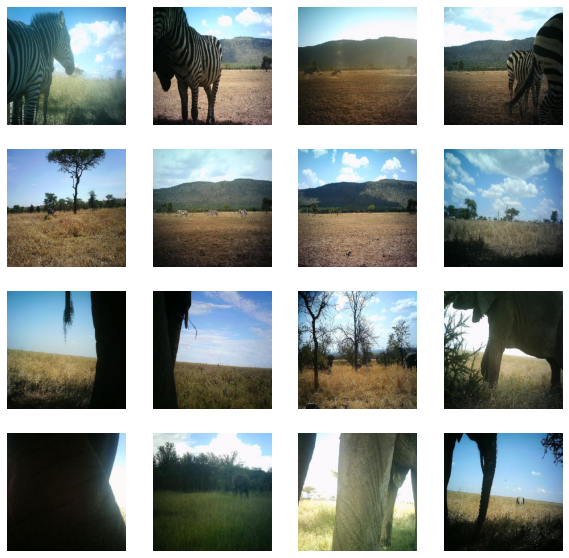

In [138]:
#Print images to see what we are working with and ensure that data has been split correctly.

import matplotlib.pyplot as plt
import numpy as np
import cv2

from IPython.core.pylabtools import figsize

samples_zebra = [os.path.join(train_zebra_dir,np.random.choice(os.listdir(train_zebra_dir),1)[0]) for _ in range(8)]
samples_elephant = [os.path.join(train_elephant_dir,np.random.choice(os.listdir(train_elephant_dir),1)[0]) for _ in range(8)]

nrows = 4
ncols = 4

fig, ax = plt.subplots(nrows,ncols,figsize = (10,10))
ax = ax.flatten()

for i in range(nrows*ncols):
  if i < 8:
    pic = plt.imread(samples_zebra[i%8])
    ax[i].imshow(pic)
    ax[i].set_axis_off()
  else:
    pic = plt.imread(samples_elephant[i%8])
    ax[i].imshow(pic)
    ax[i].set_axis_off()
plt.show()

In [139]:
import torch
import torchvision
from torchvision import datasets, transforms

traindir = 'Train'
testdir =  'Test'

In [140]:
#transformations
train_transforms = transforms.Compose([transforms.Resize((224,224)),
                                       transforms.ToTensor(),                                
                                       torchvision.transforms.Normalize(
                                           mean=[0.485, 0.456, 0.406],
                                           std=[0.229, 0.224, 0.225],
    ),
                                       ])
test_transforms = transforms.Compose([transforms.Resize((224,224)),
                                      transforms.ToTensor(),
                                      torchvision.transforms.Normalize(
                                          mean=[0.485, 0.456, 0.406],
                                          std=[0.229, 0.224, 0.225],
    ),
                                      ])

In [141]:
list_plastic = os.listdir(traindir) 
number_files_plastic = len(list_plastic)
print(number_files_plastic)

2


In [142]:
#datasets
train_data = datasets.ImageFolder(traindir,transform=train_transforms)
test_data = datasets.ImageFolder(testdir,transform=test_transforms)

In [143]:
from keras import layers
from keras import models

#Created sequential models using Keras
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 17, 17, 128)     

In [144]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory("Train",
                                                    target_size=(150, 150), 
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory("Valid",
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [145]:
# from tensorflow import keras
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

In [154]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=50,
                              epochs=20,
                              validation_data=validation_generator,
                              validation_steps=10)


Epoch 1/20


/var/folders/tf/tsz9f2110cng0r55pjl5pd240000gn/T/ipykernel_65327/3366722455.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


50/50 [==============================] - 17s 329ms/step - loss: 0.2448 - acc: 0.8900 - val_loss: 0.2596 - val_acc: 0.9050
Epoch 2/20
50/50 [==============================] - 16s 325ms/step - loss: 0.2775 - acc: 0.8840 - val_loss: 0.3563 - val_acc: 0.8300
Epoch 3/20
50/50 [==============================] - 16s 328ms/step - loss: 0.2938 - acc: 0.8760 - val_loss: 0.2350 - val_acc: 0.8850
Epoch 4/20
50/50 [==============================] - 16s 318ms/step - loss: 0.2347 - acc: 0.8970 - val_loss: 0.2335 - val_acc: 0.8900
Epoch 5/20
50/50 [==============================] - 16s 323ms/step - loss: 0.2543 - acc: 0.8920 - val_loss: 0.1960 - val_acc: 0.9250
Epoch 6/20
50/50 [==============================] - 16s 316ms/step - loss: 0.2572 - acc: 0.8920 - val_loss: 0.2263 - val_acc: 0.8950
Epoch 7/20
50/50 [==============================] - 16s 319ms/step - loss: 0.2011 - acc: 0.9150 - val_loss: 0.2750 - val_acc: 0.8900
Epoch 8/20
50/50 [==============================] - 16s 321ms/step - loss: 0.224

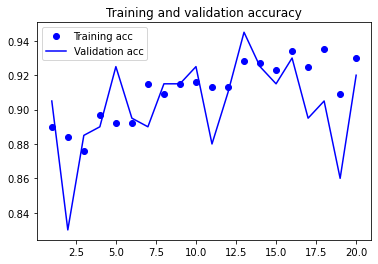

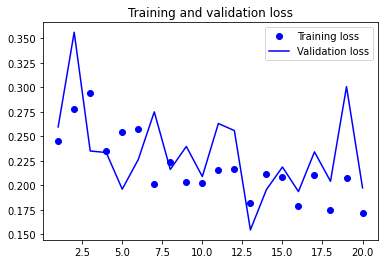

In [155]:
#model.save('zebra_girrrafe.h5')

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [156]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [157]:

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory("Train",
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory("Valid",
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')

history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=20,
                              validation_data=validation_generator,
                              validation_steps=10)

Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/20


/var/folders/tf/tsz9f2110cng0r55pjl5pd240000gn/T/ipykernel_65327/1240765498.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


100/100 [==============================] - 33s 322ms/step - loss: 0.6432 - acc: 0.6345 - val_loss: 0.5709 - val_acc: 0.7100
Epoch 2/20
100/100 [==============================] - 32s 319ms/step - loss: 0.5680 - acc: 0.7005 - val_loss: 0.4845 - val_acc: 0.7450
Epoch 3/20
100/100 [==============================] - 34s 336ms/step - loss: 0.5250 - acc: 0.7300 - val_loss: 0.4286 - val_acc: 0.8400
Epoch 4/20
100/100 [==============================] - 34s 335ms/step - loss: 0.4571 - acc: 0.7875 - val_loss: 0.4561 - val_acc: 0.8000
Epoch 5/20
100/100 [==============================] - 34s 341ms/step - loss: 0.4620 - acc: 0.7815 - val_loss: 0.3519 - val_acc: 0.8250
Epoch 6/20
100/100 [==============================] - 35s 353ms/step - loss: 0.4280 - acc: 0.7995 - val_loss: 0.4903 - val_acc: 0.7900
Epoch 7/20
100/100 [==============================] - 39s 385ms/step - loss: 0.4301 - acc: 0.7955 - val_loss: 0.4933 - val_acc: 0.8150
Epoch 8/20
100/100 [==============================] - 44s 433ms/st

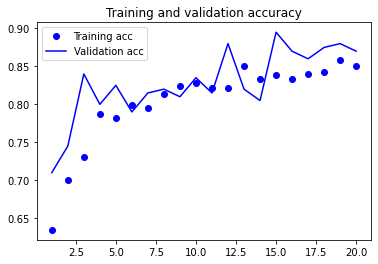

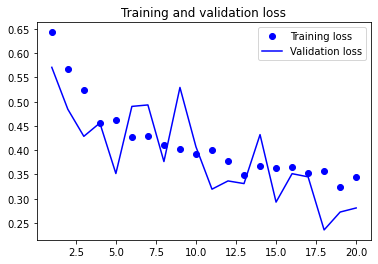

In [159]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()